In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('C:/Users/Admin/Code/CelebrityFaceDetection/Model/test_images/image_24.jpeg')
img.shape

(271, 186, 3)

In [3]:
print(cv2.__version__)

4.10.0


In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(271, 186)

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('C:/Users/Admin/Code/CelebrityFaceDetection/Model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Admin/Code/CelebrityFaceDetection/Model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 46,  35, 101, 101]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(46, 35, 101, 101)

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

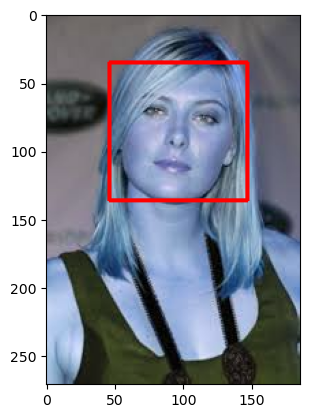

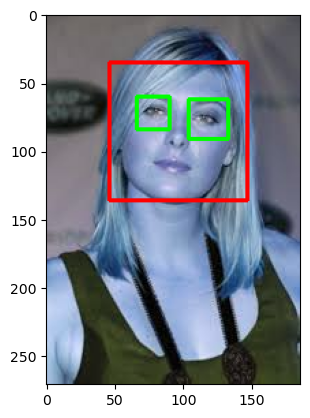

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2 :
            return roi_color

In [13]:
original_image = cv2.imread('C:/Users/Admin/Code/CelebrityFaceDetection/Model/test_images/image_24.jpeg')
plt.imshow(original_image)

In [14]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/Admin/Code/CelebrityFaceDetection/Model/test_images/image_24.jpeg')
plt.imshow(cropped_image)

In [15]:
path_to_data="./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./Dataset/alison_brie',
 './Dataset/emilia_clarke',
 './Dataset/hugh_jackman',
 './Dataset/jake_gyllenhaal',
 './Dataset/maria_sharapova']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
   

alison_brie
Generating cropped images in folder:  ./Dataset/cropped/alison_brie
emilia_clarke
Generating cropped images in folder:  ./Dataset/cropped/emilia_clarke
hugh_jackman
Generating cropped images in folder:  ./Dataset/cropped/hugh_jackman
jake_gyllenhaal
Generating cropped images in folder:  ./Dataset/cropped/jake_gyllenhaal
maria_sharapova
Generating cropped images in folder:  ./Dataset/cropped/maria_sharapova


In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [21]:
cropped_img = get_cropped_image_if_2_eyes('C:/Users/Admin/Code/CelebrityFaceDetection/Model/test_images/image_24.jpeg')
cropped_img.shape
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
celebrity_file_names_dict

{'alison_brie': ['./Dataset/cropped/alison_brie/alison_brie1.png',
  './Dataset/cropped/alison_brie/alison_brie2.png',
  './Dataset/cropped/alison_brie/alison_brie3.png',
  './Dataset/cropped/alison_brie/alison_brie4.png',
  './Dataset/cropped/alison_brie/alison_brie5.png',
  './Dataset/cropped/alison_brie/alison_brie6.png',
  './Dataset/cropped/alison_brie/alison_brie7.png',
  './Dataset/cropped/alison_brie/alison_brie8.png',
  './Dataset/cropped/alison_brie/alison_brie9.png',
  './Dataset/cropped/alison_brie/alison_brie10.png',
  './Dataset/cropped/alison_brie/alison_brie11.png',
  './Dataset/cropped/alison_brie/alison_brie12.png',
  './Dataset/cropped/alison_brie/alison_brie13.png',
  './Dataset/cropped/alison_brie/alison_brie14.png',
  './Dataset/cropped/alison_brie/alison_brie15.png',
  './Dataset/cropped/alison_brie/alison_brie16.png',
  './Dataset/cropped/alison_brie/alison_brie17.png',
  './Dataset/cropped/alison_brie/alison_brie18.png',
  './Dataset/cropped/alison_brie/alison_

In [23]:
class_dict = {}
count = 0 
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'alison_brie': 0,
 'emilia_clarke': 1,
 'hugh_jackman': 2,
 'jake_gyllenhaal': 3,
 'maria_sharapova': 4}

In [24]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_image = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_image.reshape(32*32*3, 1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [25]:
x[0]

array([[235],
       [236],
       [234],
       ...,
       [189],
       [254],
       [ 48]], dtype=uint8)

In [26]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(321, 4096)

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8148148148148148

In [29]:
len(x_test)

81

In [30]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.67      0.93      0.78        15
           2       1.00      0.68      0.81        19
           3       0.76      0.90      0.83        21
           4       0.85      0.85      0.85        13

    accuracy                           0.81        81
   macro avg       0.85      0.81      0.82        81
weighted avg       0.85      0.81      0.82        81



In [76]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [77]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C':[1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }

    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [78]:
scores = []
best_estimators = {}

import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_scores': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model','best_scores','best_params'])
df


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_scores,best_params
0,svm,0.741667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.512500,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.800000,{'logisticregression__C': 1}


In [79]:
best_estimators['svm'].score(x_test, y_test)

0.8024691358024691

In [80]:
best_estimators['random_forest'].score(x_test, y_test)

0.6666666666666666

In [81]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.8148148148148148

In [82]:
best_clf = best_estimators['svm']

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[10,  3,  0,  0,  0],
       [ 1, 12,  0,  0,  2],
       [ 0,  2, 14,  3,  0],
       [ 1,  2,  0, 17,  1],
       [ 0,  1,  0,  0, 12]], dtype=int64)

In [84]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

In [85]:
class_dict

{'alison_brie': 0,
 'emilia_clarke': 1,
 'hugh_jackman': 2,
 'jake_gyllenhaal': 3,
 'maria_sharapova': 4}

In [86]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pk1')

['saved_model.pk1']

In [87]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))